In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/census_2011.csv")

# Problem Statement 1: (Keep the relevant data)

The census 2011 file contains many fields, which we may not use. Removing some columns so that we are left with only relevant data.

In [4]:
req_col = ['State name','District name','Population','Male','Female','Literate','Male_Literate','Female_Literate','Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']

data = data [req_col]

data.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem Statement 2: (Rename the Column names)

For uniformity in the datasets and taking into consideration the census year, we are renaming some columns.

In [5]:
col_rename = {
    'State name'  : 'State/UT',
    'District name'  : 'District',
    'Male_Literate' : 'Literate_Male',
    'Female_Literate' : 'Literate_Female',
    'Rural_Households'  : 'Households_Rural',
    'Urban_Households'  : 'Households_Urban',
    'Age_Group_0_29' : 'Young_and_Adult',
    'Age_Group_30_49' : 'Middle_Aged',
    'Age_Group_50' : 'Senior_Citizen',
    'Age not stated' : 'Age_Not_Stated',
}

data.rename (columns = col_rename ,inplace = True)

data.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem Statement 3: (Rename State/UT Names)

The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.

In [6]:
def State_Name(word):
    if word.lower() == 'and':
        return 'and'
    else:
        return word.title()
    
data['State/UT'] = data['State/UT'].apply(lambda x: ' '.join(State_Name(w) for w in x.split()))

data.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [7]:
data.tail()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0
639,Andaman and Nicobar Islands,South Andaman,NaN,127283.0,110859.0,190266.0,105794.0,84472.0,34901.0,50631.0,85532.0,128402.0,76332.0,33128.0,280.0


#  Problem Statement 4: (New State/UT formation)

In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil. Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts

In [8]:
telangana_districts = []
with open('E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/Telangana.txt', 'r') as file:
    telangana_districts = [line.strip() for line in file]

ladakh_districts = ['Leh', 'Kargil']

data.loc[data['District'].isin(telangana_districts), 'State/UT']='Telangana'
data.loc[data['District'].isin(ladakh_districts), 'State/UT']='Laddakh'

data.loc[(data['State/UT'] == "Laddakh") | (data['State/UT'] == "Telangana")]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Telangana,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0


# Problem Statement 5: (Find and process Missing Data)

Find and store the percentage of data missing for each column.

In [9]:
data.isnull().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [10]:
missing_percentage_before = (data.isnull().sum() / len(data)) * 100
print((missing_percentage_before))

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64


In [18]:
data['Population'].fillna(data['Male'] + data['Female'], inplace=True)
data['Male'].fillna(data['Population'] - data['Female'], inplace=True)
data['Female'].fillna(data['Population'] - data['Male'], inplace=True)
data['Literate'].fillna(data['Literate_Male'] + data['Literate_Female'],inplace=True)
data['Literate_Female'].fillna(data['Literate'] - data['Literate_Male'],inplace=True)
data['Literate_Male'].fillna(data['Literate'] - data['Literate_Female'],inplace=True)
data['Households_Rural'].fillna(data['Households'] - data['Households_Urban'],inplace=True)
data['Households_Urban'].fillna(data['Households'] - data['Households_Rural'],inplace=True)
data['Households'].fillna(data['Households_Rural'] + data['Households_Urban'],inplace=True)
data['Young_and_Adult'].fillna(data['Population'] - data['Middle_Aged'] - data['Senior_Citizen'] - data['Age_Not_Stated'],inplace=True)
data['Middle_Aged'].fillna(data['Population'] - data['Young_and_Adult'] - data['Senior_Citizen'] - data['Age_Not_Stated'],inplace=True)
data['Senior_Citizen'].fillna(data['Population'] - data['Young_and_Adult'] - data['Middle_Aged'] - data['Age_Not_Stated'],inplace=True)
data['Age_Not_Stated'].fillna(data['Population'] - data['Young_and_Adult'] - data['Middle_Aged'] - data['Senior_Citizen'],inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_20044\985199005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Population'].fillna(data['Male'] + data['Female'], inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_20044\985199005.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [19]:
missing_percentage_after = (data.isnull().sum() / len(data)) * 100
print(missing_percentage_after)

State/UT            0.00000
District            0.00000
Population          0.15625
Male                0.15625
Female              0.00000
Literate            0.31250
Literate_Male       0.31250
Literate_Female     0.31250
Households_Rural    0.93750
Households_Urban    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.93750
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64


Create a visualization that compares the amount of missing data before and after the data-filling process was done.

In [20]:
mpb=[]
mpa=[]

for i in missing_percentage_before:
    mpb.append(i)
    
for i in missing_percentage_after:
    mpa.append(i)

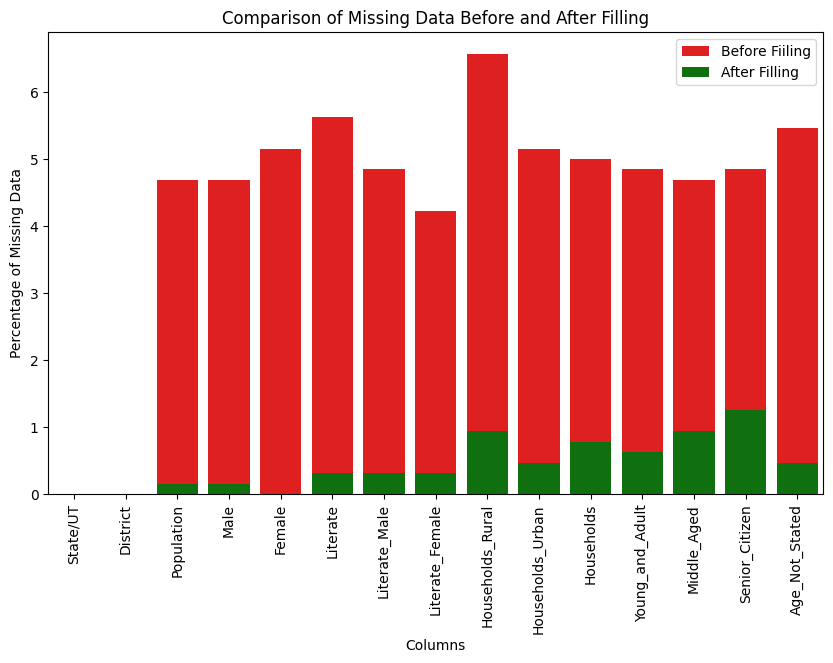

In [21]:
X = data.columns.tolist()
X_axis = np.arange(len(X)) 

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_before.index, y=missing_percentage_before, color='red', label='Before Fiiling')
sns.barplot(x=missing_percentage_after.index, y=missing_percentage_after, color='green', label='After Filling')

plt.xticks(X_axis,X,rotation=90) 
plt.title('Comparison of Missing Data Before and After Filling')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.legend()
plt.show()

# Problem Statement 6: (Save Data)

In [24]:
data.to_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Clean_data/census_data.csv",index=False)

# Problem Statement 7: (Process the relevant data)

From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms. The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

In [25]:
data_housing=pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/housing.csv")

census_data = pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Clean_data/census_data.csv")

In [26]:
merged_data = pd.merge(left=data_housing, right=census_data, left_on='District Name', right_on='District', how='left')

merged_data['Households_Rural'] = merged_data['Total Number of households'] * merged_data['Households_Rural'] / 100
merged_data['Households_Urban'] = merged_data['Total Number of households'] * merged_data['Households_Urban'] / 100
merged_data['Households_Rural_Livable'] = merged_data['Households_Rural'] * merged_data['Total Number of Livable'] / 100
merged_data['Households_Urban_Livable'] = merged_data['Households_Urban'] * merged_data['Total Number of Livable'] / 100
merged_data['Households_Rural_Dilapidated'] = merged_data['Households_Rural'] * merged_data['Total Number of Dilapidated'] / 100
merged_data['Households_Urban_Dilapidated'] = merged_data['Households_Urban'] * merged_data['Total Number of Dilapidated'] / 100
merged_data['Households_Rural_Toilet_Premise'] = merged_data['Households_Rural'] * merged_data['Latrine_premise'] / 100
merged_data['Households_Urban_Toilet_Premise'] = merged_data['Households_Urban'] * merged_data['Latrine_premise'] / 100

merged_data.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Households_Rural_Livable,Households_Urban_Livable,Households_Rural_Dilapidated,Households_Urban_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Toilet_Premise
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,600759.0,178435.0,89679.0,1481.0,92052.478,13494.306,13150.354,1927.758,77476.182,11357.514
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,600759.0,178435.0,89679.0,1481.0,90784.974,13308.498,12516.602,1834.854,80644.942,11822.034
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,600759.0,178435.0,89679.0,1481.0,78426.810,11496.870,7605.024,1114.848,111223.476,16304.652
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,503223.0,160933.0,88978.0,611.0,74380.487,12588.970,6265.311,1060.410,133820.617,22649.270
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,503223.0,160933.0,88978.0,611.0,71810.103,12153.930,6104.662,1033.220,135427.107,22921.170


Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it has the following column names.

In [27]:
final_columns = ['District Name', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
                 'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']

final_data = merged_data[final_columns]

column_rename = {
    'District Name': 'District',
    'Households_Rural': 'Households_Rural',
    'Households_Rural_Livable': 'Households_Rural_Livable',
    'Households_Rural_Dilapidated': 'Households_Rural_Dilapidated',
    'Households_Rural_Toilet_Premise': 'Households_Rural_Toilet_Premise',
    'Households_Urban': 'Households_Urban',
    'Households_Urban_Livable': 'Households_Urban_Livable',
    'Households_Urban_Dilapidated': 'Households_Urban_Dilapidated',
    'Households_Urban_Toilet_Premise': 'Households_Urban_Toilet_Premise'
}

final_data = final_data.rename(columns=column_rename)

In [28]:
final_data.to_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Clean_data/housing.csv",index=False)

# Problem Statement 8: (Visualise the housing data)

	Number of households for 100 people

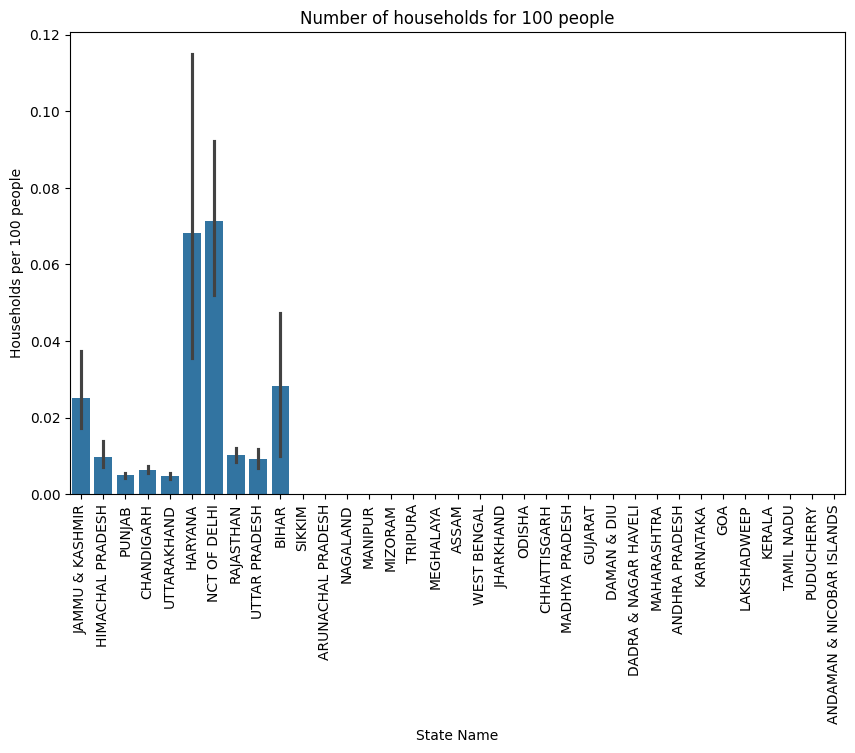

In [29]:
data_housing['Households_per_100_people'] = (data_housing['Total Number of households'] / census_data['Population']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='State Name', y='Households_per_100_people', data=data_housing)
plt.title('Number of households for 100 people')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Households per 100 people')
plt.show()

	Percentage of households that have toilet(s) in premise to the total number of households.

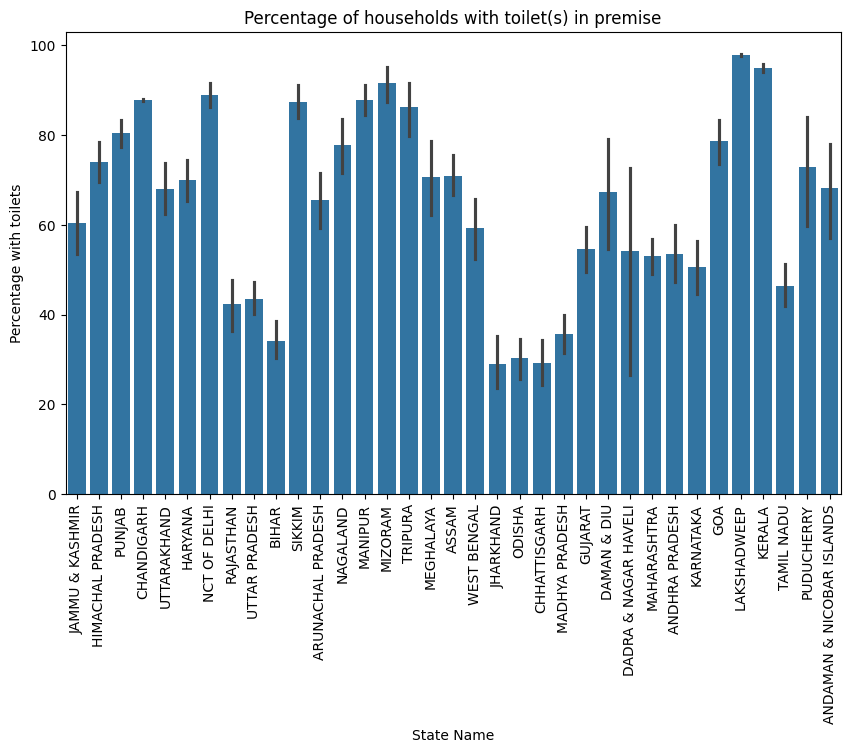

In [30]:
data_housing['Percentage_with_toilets'] = (data_housing['Latrine_premise'] / data_housing['Total Number of households']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='State Name', y='Percentage_with_toilets', data=data_housing)
plt.title('Percentage of households with toilet(s) in premise')

plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Percentage with toilets')
plt.show()

	Urban to rural population ratio.

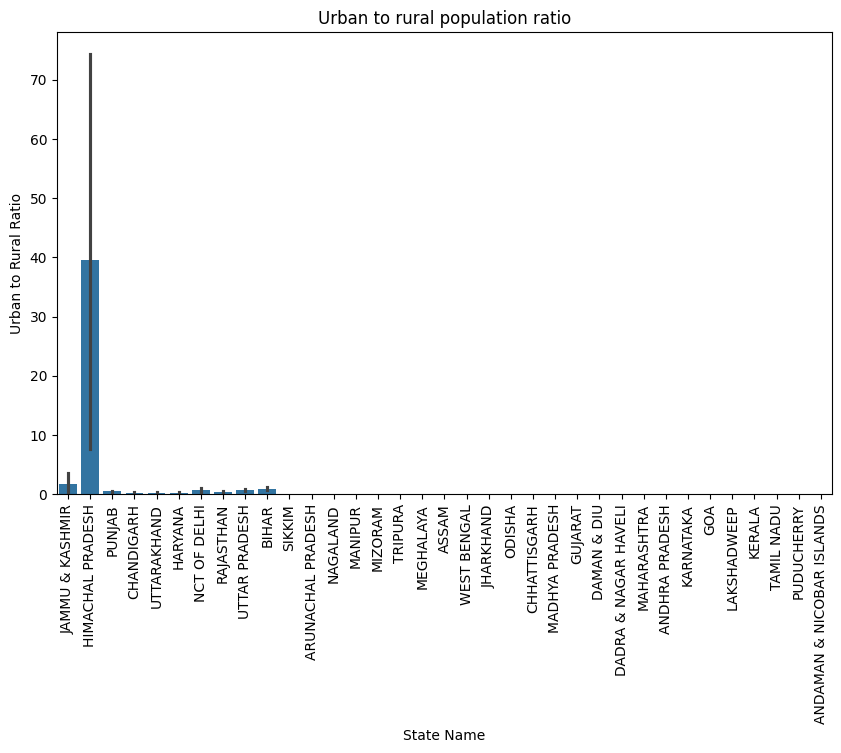

In [24]:
data_housing['Urban_to_Rural_Ratio'] = census_data['Households_Urban'] / census_data['Households_Rural']

plt.figure(figsize=(10, 6))
sns.barplot(x='State Name', y='Urban_to_Rural_Ratio', data=data_housing)
plt.title('Urban to rural population ratio')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Urban to Rural Ratio')
plt.show()

# Problem Statement 9: (Inconsistency in different datasets)

After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and report the names of the districts difference of more than 10% can be considered a major difference.  

In [58]:
merged_data = pd.merge(data_housing, census_data, left_on='District Name', how='inner')

merged_data['Rural_Difference'] = (merged_data['Households_Rural_x'] - merged_data['Households_Rural_y']) / merged_data['Households_Rural_x'] * 100
merged_data['Urban_Difference'] = (merged_data['Households_Urban_x'] - merged_data['Households_Urban_y']) / merged_data['Households_Urban_x'] * 100

major_difference_districts = merged_data[(abs(merged_data['Rural_Difference']) > 10) | (abs(merged_data['Urban_Difference']) > 10)]['District Name'].tolist()

print("Districts with major difference in 'Households_Rural' or 'Households_Urban':")
print(major_difference_districts)

MergeError: Must pass "right_on" OR "right_index".

Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). Apart from general information she wants to know which states need more hospital beds at the earliest.
Assist Aliah to gain insights from the data after cleaning it. 

In [31]:
hospital_data=pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/hospitals.csv")

In [32]:
hospital_data = hospital_data.dropna()

In [33]:
hospital_data['HospitalBeds'] = pd.to_numeric(hospital_data['HospitalBeds'], errors='coerce')

In [34]:
hospital_data = hospital_data.dropna(subset=['HospitalBeds'])

In [35]:
total_beds = hospital_data.groupby('State/UT')['HospitalBeds'].sum()
total_population = census_data.groupby('State/UT')['Population'].sum()

In [36]:
average_population_per_bed_by_state = total_population / total_beds
target_ratio = 1000


In [37]:
required_beds_by_state = total_population / target_ratio
shortage_beds_by_state = required_beds_by_state - total_beds

In [38]:
states_with_shortage = shortage_beds_by_state[shortage_beds_by_state > 0].index.tolist()
print("States that needs More Hospital Beds at Earliest:")
print(states_with_shortage)

States that needs More Hospital Beds at Earliest:
['Assam', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Punjab', 'Rajasthan', 'Telangana', 'Uttarakhand', 'West Bengal']


# Problem Statement 10: (Fix the header)

Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).
The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format. 


In [39]:
meta_data=pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/metadata.csv")

In [40]:
header_rename = {
    'PHC':'Number of Primary Health Centers',
    'CHC':'Community Health Centers',
    'SDH':'Sub-District/Divisional Hospitals',
    'DH':'District Hospitals',
}

hospital_data.rename(columns=header_rename, inplace=True)

In [41]:
hospital_data.rename(columns={hospital_data.columns[0]: 'State/UT'})
hospital_data.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
1,Andhra Pradesh,1417,198,31,20,1666,60799.0
3,Assam,1007,166,14,33,1220,19115.0
4,Bihar,2007,63,33,43,2146,17796.0
5,Chandigarh,40,2,1,4,47,3756.0
6,Chhattisgarh,813,166,12,32,1023,14354.0


# Problem Statement 11: (Create a function to alter the data to create uniformity)

The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data. A function should be created to perform this operation. Since the same operation is required for another dataset as well. 

In [51]:
def fix_state_names(data):
    

    state_ut_mapping = {
        'Delhi': 'Nct Of Delhi',
        'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
        'Jammu & Kashmir':'Jammu and Kashmir',
        'Daman & Diu':'Daman and Diu',
        'Andaman & Nicobar Islands':'Andaman and Nicobar Islands',
    }

    data['State/UT'] = data['State/UT'].map(state_ut_mapping).fillna(data['State/UT'])

    return data


fixed_dataset = fix_state_names(hospital_data)

fixed_dataset.head()


,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
1,Andhra Pradesh,1417,198,31,20,1666,60799.0
3,Assam,1007,166,14,33,1220,19115.0
4,Bihar,2007,63,33,43,2146,17796.0
5,Chandigarh,40,2,1,4,47,3756.0
6,Chhattisgarh,813,166,12,32,1023,14354.0


After the process saving the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder

In [43]:
fixed_dataset.to_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Clean_data/all_hospitals.csv",index=False)

# Problem Statement 12: (Analyze Healthcare facility disparity)

Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  Report three States/UTs which have the least amount of beds for their population so that more beds can be added to the hospitals in respective states.

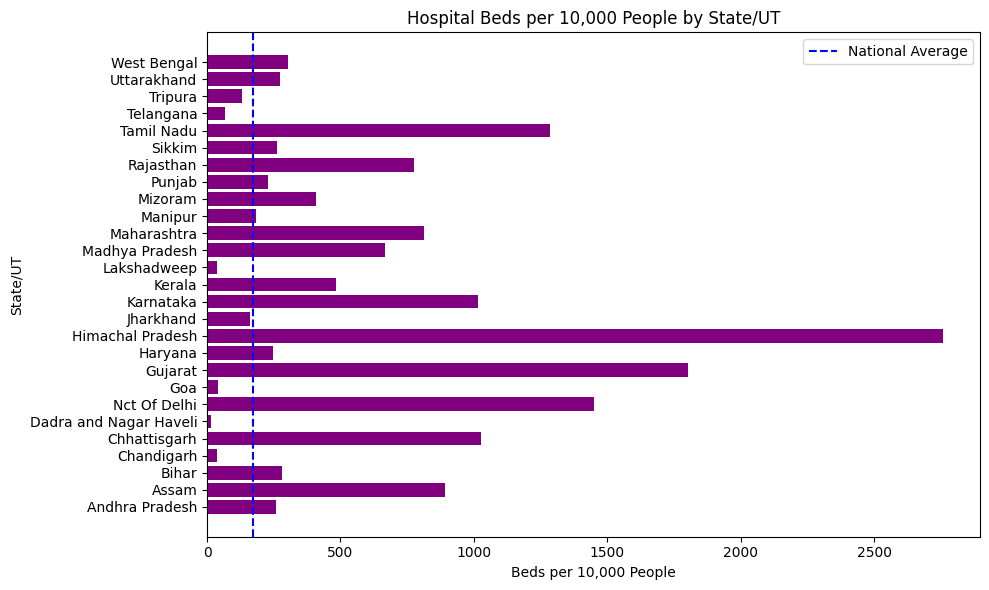

In [60]:
merged_data = pd.merge(hospital_data, census_data, on='State/UT', how='inner')

merged_data['Beds_per_10000'] = (merged_data['HospitalBeds'] / merged_data['Population']) * 10000

national_average = merged_data['HospitalBeds'].sum() / merged_data['Population'].sum() * 10000

plt.figure(figsize=(10, 6))
plt.barh(merged_data['State/UT'], merged_data['Beds_per_10000'], color='purple')
plt.axvline(x=national_average, color='blue', linestyle='--', label='National Average')
plt.xlabel('Beds per 10,000 People')
plt.ylabel('State/UT')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.legend()
plt.tight_layout()

plt.show()

The Union of Doctors in its meeting passed a resolution that the government hospitals are lacking in numbers in many states, The 
government has taken notice of the resolution and has asked for a recommendation for the state where a new government hospital can
 be set up. Use the government hospital data (Data/government_hospitals.csv) to suggest which state the government should create a 
new hospital.


In [45]:
govt_hospital=pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/Project - 1/Data/government_hospitals.csv")

In [46]:
statewise_hospital_info = hospital_data.groupby('State/UT').agg({'State/UT': 'count', 'HospitalBeds': 'sum'})

statewise_hospital_info['Beds_per_Hospital'] = statewise_hospital_info['HospitalBeds'] / statewise_hospital_info['State/UT']

national_average_beds_per_hospital = statewise_hospital_info['Beds_per_Hospital'].mean()

recommendation = statewise_hospital_info[statewise_hospital_info['Beds_per_Hospital'] < national_average_beds_per_hospital].index.tolist()

print("Based on the analysis the government should consider setting up a new hospital in the following state(s):")
for state in recommendation:
    print(state)

Based on the analysis the government should consider setting up a new hospital in the following state(s):
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Goa
Haryana
Himachal Pradesh
Jharkhand
Lakshadweep
Manipur
Mizoram
Nct Of Delhi
Odisha
Puducherry
Punjab
Sikkim
Telangana
Tripura
Uttarakhand


# Problem Statement 13: (Multi-line header)

The headers are required to be edited for ease of future use as well as for the sake of uniformity. 
Import and update the data in a way that it has the following column names


In [47]:
govt_hospital.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds', 'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']

govt_hospital = govt_hospital.iloc[1:]

govt_hospital.reset_index(drop=True, inplace=True)

In [48]:
govt_hospital.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


# Problem Statement 14: (Data update and code reuse)

The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.

In [49]:
govt_hospital['Last_Updated'] = pd.to_datetime(govt_hospital['Last_Updated'], format='%d.%m.%Y')

govt_hospital['Last_Updated'] = govt_hospital['Last_Updated'].dt.strftime('%Y-%m-%d')

In [50]:
govt_hospital.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh*,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01


The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.

In [56]:
def state_names(data):
    
    state_mapping = {
        'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
        'Jammu & Kashmir':'Jammu and Kashmir',
        'Daman & Diu':'Daman and Diu',
        'Andaman & Nicobar Islands':'Andaman and Nicobar Islands',
    }

    data['State/UT'] = data['State/UT'].map(state_mapping).fillna(data['State/UT'])
    return data


fixed_data = state_names(govt_hospital)
fixed_data.head()


,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh*,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01


Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.

In [57]:
fixed_data.to_csv("E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data/government_hospital.csv")

# Problem Statement 15: (Government healthcare facility disparity)

Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


In [ ]:
# Load government hospital data
government_hospitals_data = pd.read_csv('Data/government_hospitals.csv')

# Load private hospital data
private_hospitals_data = pd.read_csv('Data/private_hospitals.csv')

# Merge government and private hospital data to get total beds per state
total_beds_per_state = government_hospitals_data.groupby('State/UT')['Number_of_Beds'].sum() + private_hospitals_data.groupby('State/UT')['Number_of_Beds'].sum()
total_beds_per_state = total_beds_per_state.reset_index()

# Merge with population data to get beds per capita
beds_per_capita = pd.merge(total_beds_per_state, census_data, on='State/UT')
beds_per_capita['Beds_per_Capita'] = beds_per_capita['Number_of_Beds'] / beds_per_capita['Population']

# Identify the three states with the least amount of beds per capita
bottom_three_states = beds_per_capita.nsmallest(3, 'Beds_per_Capita')

# Filter government hospital data for the three states with the least amount of beds per capita
government_hospitals_bottom_three = government_hospitals_data[government_hospitals_data['State/UT'].isin(bottom_three_states['State/UT'])]

# Count the number of government hospitals in each of the bottom three states
government_hospitals_count = government_hospitals_bottom_three.groupby('State/UT')['Hospital_Name'].count()

# Identify the state with the least number of government hospitals among the bottom three states
recommended_state = government_hospitals_count.idxmin()

print("Recommended state for setting up a new government hospital:", recommended_state)


According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?

In [ ]:
# Load hospital data
hospital_data = pd.read_csv('Data/all_hospitals.csv')

# Merge population and hospital data
merged_data = pd.merge(census_data, hospital_data, on='State/UT')

# Calculate total number of beds per capita
merged_data['Beds_per_Capita'] = merged_data['Number of Beds'] / merged_data['Population'] * 1000

# Determine if each region meets the WHO standard
merged_data['Meets_WHO_Standard'] = merged_data['Beds_per_Capita'] >= 3

# Calculate shortfall of beds for regions that do not meet the WHO standard
merged_data['Bed_Shortfall'] = (3 - merged_data['Beds_per_Capita']) * merged_data['Population'] / 1000
merged_data['Bed_Shortfall'] = merged_data['Bed_Shortfall'].apply(lambda x: max(0, x))  # Set negative shortfalls to 0

# Aggregate data to determine national shortfall
national_shortfall = merged_data['Bed_Shortfall'].sum()

# Display analysis results
print("Analysis of Hospital Bed Capacity:")
print(merged_data[['State/UT', 'Beds_per_Capita', 'Meets_WHO_Standard', 'Bed_Shortfall']])

if national_shortfall > 0:
    print("\nTotal Shortfall of Beds at National Level: {:.2f} beds".format(national_shortfall))
else:
    print("\nAll regions meet the WHO standard. No shortfall of beds at the national level.")


# Problem Statement 16: (Gap in number of beds)

Visually representing the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).

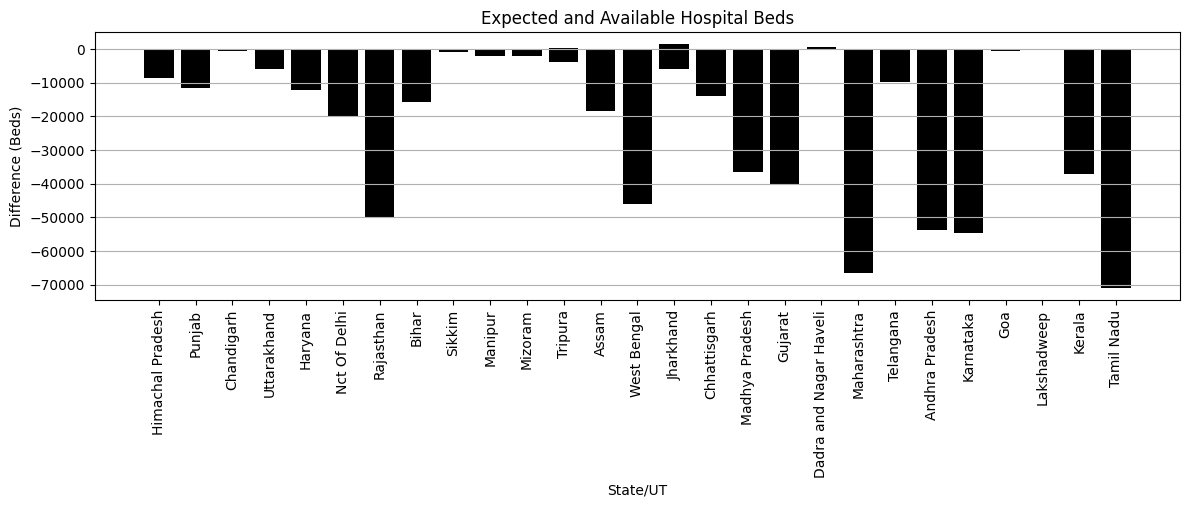

In [65]:
merged_data = pd.merge(census_data, hospital_data, on='State/UT')
merged_data['Expected_Beds'] = merged_data['Population'] / 1000 * 3
merged_data['Available_Beds'] = merged_data['HospitalBeds']


plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(merged_data['State/UT'], merged_data['Expected_Beds'] - merged_data['Available_Beds'], color='black')
plt.title('Expected and Available Hospital Beds')
plt.xlabel('State/UT')
plt.ylabel('Difference (Beds)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


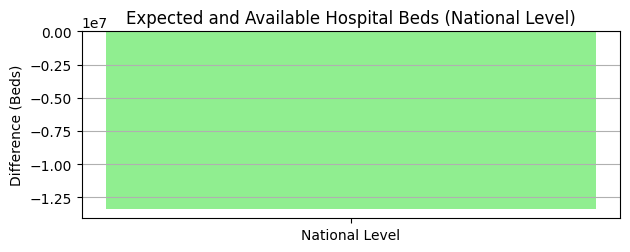

In [83]:
total_expected_beds = merged_data['Expected_Beds'].sum()
total_available_beds = merged_data['Available_Beds'].sum()
national_difference = total_expected_beds - total_available_beds

plt.subplot(2, 1, 2)
plt.bar(['National Level'], [national_difference], color='lightgreen')
plt.title('Expected and Available Hospital Beds (National Level)')
#plt.xlabel('National Level')
plt.ylabel('Difference (Beds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Problem Statement 17: (Hospitals required to meet the standards)

In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?
Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.

Represent the findings visually.

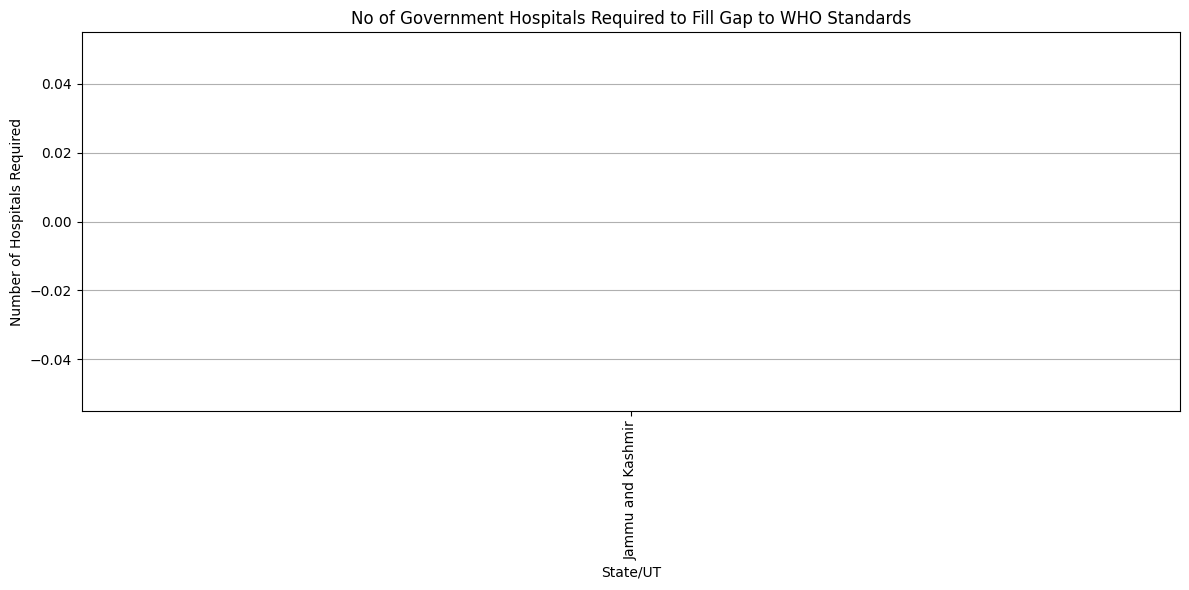

In [86]:
target_value = census_data['Population'] / 1000 * 3
census_data['Gap_Beds'] = target_value - hospital_data.groupby('State/UT')['HospitalBeds'].sum()
average_beds_per_hospital = hospital_data['HospitalBeds'].mean()
census_data['Hospitals_Required'] = (census_data['Gap_Beds'] / average_beds_per_hospital).round()

plt.figure(figsize=(12, 6))
plt.bar(census_data['State/UT'], census_data['Hospitals_Required'], color='orange')
plt.title('No of Government Hospitals Required to Fill Gap to WHO Standards')
plt.xlabel('State/UT')
plt.ylabel('Number of Hospitals Required')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The department of Healthcare wants to access all the clean data to be accessed over the internet through its official website. They have sent a requirement to upload all the data that has been cleaned to a database.
You have been given the responsibility to address their requirement.


In [1]:
import sqlite3

In [8]:
conn = sqlite3.connect('')
cursor = conn.cursor()



clean_data_files = ['E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data/housing.csv',
                    'E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data/census_data.csv',
                    'E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data/government_hospital.csv',
                    'E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data/all_hospitals.csv']  


for file in zip(clean_data_files):
    cleaned_data = pd.read_csv("E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data")
    upload_data_to_database(cleaned_data)

conn.close()


PermissionError: [Errno 13] Permission denied: 'E:/Futurense/Futurense-Internship/Assignments/project - 1/Clean_data'